# Regression

# Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Load Dataset

In [2]:
# Load dataset
user_details_data = pd.read_csv("/Users/akhilaannireddy/Projects/Machine_learning_project/Dataset/cleaned_user_data.csv")
user_details_data.head()

,user_id,display_name,reputation,profile_image,user_type,link,account_id,is_employee,last_modified_date,last_access_date,...,reputation_change_week,reputation_change_day,creation_date,accept_rate,badge_bronze,badge_silver,badge_gold,account_age_days,account_age_years,age_group
0,109,Kalid,22690,https://www.gravatar.com/avatar/5117b4aacf8b64...,registered,https://stackoverflow.com/users/109/kalid,91,False,2025-01-17 19:05:00,2015-10-10 21:32:52,...,10,0,2008-08-02 00:20:47,88.0,46,45,14,6029,16.5,15-18 Years
1,347807,CristiC,22688,https://www.gravatar.com/avatar/6023ac67694f90...,registered,https://stackoverflow.com/users/347807/cristic,141059,False,2024-04-09 05:40:03,2025-01-23 03:52:19,...,10,0,2010-05-22 13:10:40,96.0,89,61,13,5370,14.7,12-15 Years
2,3427777,fantabolous,22686,https://www.gravatar.com/avatar/34dac9c01fc709...,registered,https://stackoverflow.com/users/3427777/fantab...,4096755,False,2024-10-25 20:10:00,2024-12-09 04:11:00,...,0,0,2014-03-17 06:40:33,80.0,52,57,8,3976,10.9,10-12 Years
3,1858116,Gabriele Santomaggio,22682,https://i.sstatic.net/fQDZf.jpg?s=256,registered,https://stackoverflow.com/users/1858116/gabrie...,2087535,False,2023-12-25 15:00:00,2025-01-27 14:19:21,...,0,0,2012-11-27 23:02:03,78.0,59,58,4,4450,12.2,12-15 Years
4,13767,Rafał Rawicki,22680,https://www.gravatar.com/avatar/b043ead577679f...,registered,https://stackoverflow.com/users/13767/rafa%c5%...,7838,False,2024-05-08 11:00:00,2023-07-05 09:38:01,...,0,0,2008-09-16 20:48:13,88.0,79,63,5,5983,16.4,15-18 Years


# Create Binary Expertise Column

In [3]:
# Categorize into 4 expertise levels
expertise_labels = ['Beginner', 'Intermediate', 'Advanced', 'Expert']
user_details_data['expertise_level'] = pd.qcut(user_details_data['reputation'], q=4, labels=expertise_labels)

# Convert to binary: Beginner + Intermediate => Low, Advanced + Expert => High
user_details_data['expertise_binary'] = user_details_data['expertise_level'].apply(
    lambda x: 'Low' if x in ['Beginner', 'Intermediate'] else 'High'
)

# Drop original columns not needed
user_details_data.drop(columns=['expertise_level', 'reputation'], inplace=True)

# Drop Unnecessary Columns

In [4]:
cols_to_drop = [
    'user_id', 'display_name', 'profile_image', 'link', 'account_id',
    'last_modified_date', 'last_access_date', 'creation_date', 'is_employee', 'account_age_years'
]
user_details_data.drop(columns=cols_to_drop, inplace=True)

# Encode Categorical Features

In [5]:
# Fill missing values
user_details_data = user_details_data.fillna(0)

# Label encode categorical columns
for col in user_details_data.select_dtypes(include='object').columns:
    user_details_data[col] = LabelEncoder().fit_transform(user_details_data[col].astype(str))

# Encode target
label_encoder = LabelEncoder()
user_details_data['expertise_binary_encoded'] = label_encoder.fit_transform(user_details_data['expertise_binary'])

user_details_data.to_csv("cleaned_data_for_regression.csv")

# Prepare Train/Test Split

In [6]:
X = user_details_data.drop(columns=['expertise_binary', 'expertise_binary_encoded'])
y = user_details_data['expertise_binary_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Logistic Regression

Logistic Regression Accuracy: 0.7364

Logistic Regression Classification Report:

                precision    recall  f1-score   support

 Low Expertise       0.77      0.67      0.72     10479
High Expertise       0.71      0.81      0.75     10481

      accuracy                           0.74     20960
     macro avg       0.74      0.74      0.74     20960
  weighted avg       0.74      0.74      0.74     20960



/opt/anaconda3/envs/mlpro/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


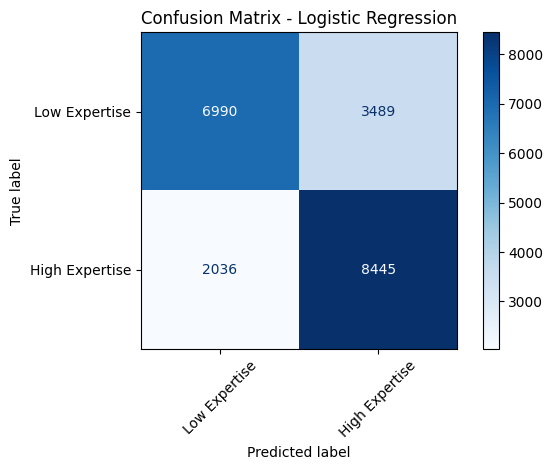

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay

# Train Logistic Regression
lr_model = LogisticRegression(max_iter=200, random_state=42)
lr_model.fit(X_train, y_train)

# Predict
y_pred_lr = lr_model.predict(X_test)
acc_lr = accuracy_score(y_test, y_pred_lr)
print(f"Logistic Regression Accuracy: {acc_lr:.4f}\n")

# Classification Report
print("Logistic Regression Classification Report:\n")
print(classification_report(y_test, y_pred_lr, target_names=["Low Expertise", "High Expertise"]))

# Confusion Matrix
ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred_lr,
    display_labels=["Low Expertise", "High Expertise"],
    cmap="Blues"
)
plt.title("Confusion Matrix - Logistic Regression")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


The Logistic Regression model achieved an overall accuracy of 73.64%, which indicates a strong performance in classifying users into "Low Expertise" and "High Expertise" categories based on the input features. This suggests that the model was able to learn meaningful patterns that differentiate the two expertise levels.

For the "Low Expertise" class, the model had a precision of 0.77 and a recall of 0.67. This means that 77% of the time when the model predicted "Low Expertise," it was correct, but it only captured 67% of all actual low expertise cases. In contrast, for the "High Expertise" class, the precision was 0.71 and the recall was 0.81, showing that the model performed better in retrieving high expertise users.

The confusion matrix supports this finding, where 6,990 out of 10,479 actual low expertise users were correctly classified, while 3,489 were misclassified. For the high expertise group, 8,445 out of 10,481 users were correctly identified, and 2,036 were misclassified.

The macro and weighted averages for precision, recall, and F1-score were all approximately 0.74, showing balanced performance between the two classes. However, the model did face some challenges in distinguishing low expertise users, which may be addressed through feature engineering or hyperparameter tuning.

Overall, the Logistic Regression model performed well in a binary classification setting and provided interpretable insights into user expertise prediction.

# Multinomial Naive Bayes

Multinomial Naive Bayes Accuracy: 0.6759

Multinomial Naive Bayes Classification Report:

                precision    recall  f1-score   support

 Low Expertise       0.77      0.50      0.61     10479
High Expertise       0.63      0.85      0.72     10481

      accuracy                           0.68     20960
     macro avg       0.70      0.68      0.67     20960
  weighted avg       0.70      0.68      0.67     20960



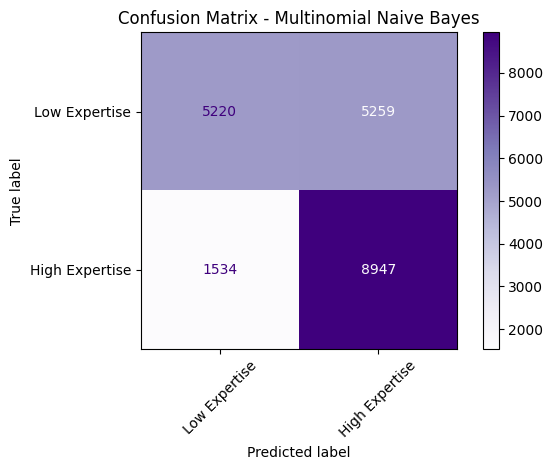

In [8]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Ensure all features are non-negative (required for MultinomialNB)
X_train_nb = X_train.copy()
X_test_nb = X_test.copy()

X_train_nb[X_train_nb < 0] = 0
X_test_nb[X_test_nb < 0] = 0

# Train Multinomial Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train_nb, y_train)

# Predict
y_pred_nb = nb_model.predict(X_test_nb)
acc_nb = accuracy_score(y_test, y_pred_nb)
print(f"Multinomial Naive Bayes Accuracy: {acc_nb:.4f}\n")

# Classification Report
print("Multinomial Naive Bayes Classification Report:\n")
print(classification_report(y_test, y_pred_nb, target_names=["Low Expertise", "High Expertise"]))

# Confusion Matrix
ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred_nb,
    display_labels=["Low Expertise", "High Expertise"],
    cmap="Purples"
)
plt.title("Confusion Matrix - Multinomial Naive Bayes")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


The Multinomial Naive Bayes model achieved an overall accuracy of 67.59%, which is lower than the logistic regression model, but still indicates a moderate ability to distinguish between "Low Expertise" and "High Expertise" users.

For the Low Expertise class, the model had a precision of 0.77 but a recall of only 0.50, meaning it correctly identified 77% of the predicted low expertise users, but captured only 50% of the actual low expertise cases. This indicates a high false negative rate for this group.

In contrast, the High Expertise class performed better, with a precision of 0.63 and a recall of 0.85. This shows the model was more effective at retrieving high expertise users, but less precise—37% of the predicted high expertise cases were actually from the low expertise group.

The macro average of precision, recall, and F1-score (all around 0.68–0.70) shows that the performance is imbalanced across the two classes. The model is clearly biased toward identifying high expertise users.

In conclusion, while Multinomial Naive Bayes is simple and fast, it was less balanced than logistic regression. It favored the high expertise group and struggled more with correctly identifying low expertise users. This outcome may be improved with additional feature engineering or trying different variants of Naive Bayes.

# Comparison

The comparison between Logistic Regression and Multinomial Naive Bayes reveals that Logistic Regression performs better overall on this binary classification task. With an accuracy of 73.64%, Logistic Regression surpasses the 67.59% accuracy achieved by Naive Bayes, indicating that it is more effective at correctly classifying users based on their expertise levels.

Looking more closely at class-wise performance, Logistic Regression demonstrates stronger balance in both precision and recall for the Low and High Expertise categories. For the Low Expertise class, both models have the same precision of 0.77. However, Logistic Regression achieves a much higher recall (0.67) compared to Naive Bayes (0.50), leading to a better F1-score of 0.72 versus 0.61. This suggests that Logistic Regression is more capable of correctly identifying users with lower expertise.

For the High Expertise class, Naive Bayes shows a higher recall (0.85), meaning it correctly detects more of the actual high expertise users. However, its precision drops to 0.63, which implies it misclassifies a larger number of low expertise users as high. In contrast, Logistic Regression maintains a more balanced performance with a precision of 0.71 and recall of 0.81, leading to a slightly higher F1-score of 0.75.

The macro and weighted averages also favor Logistic Regression, both scoring 0.74 in F1-score, while Naive Bayes lags behind with scores of 0.67. This further supports the conclusion that Logistic Regression offers more consistent and reliable predictions across both classes.

In summary, Logistic Regression demonstrates better overall accuracy and class-wise balance compared to Multinomial Naive Bayes. While Naive Bayes is more aggressive in detecting high expertise users, it sacrifices precision and overall balance. For scenarios that require dependable classification across both expertise levels, Logistic Regression stands out as the more suitable model.